# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

15:42:47 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=482332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=939017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=923129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=503870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

15:42:48 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=264326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=725460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

15:42:49 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=591521;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=337167;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

15:42:50 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=882430;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=963701;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

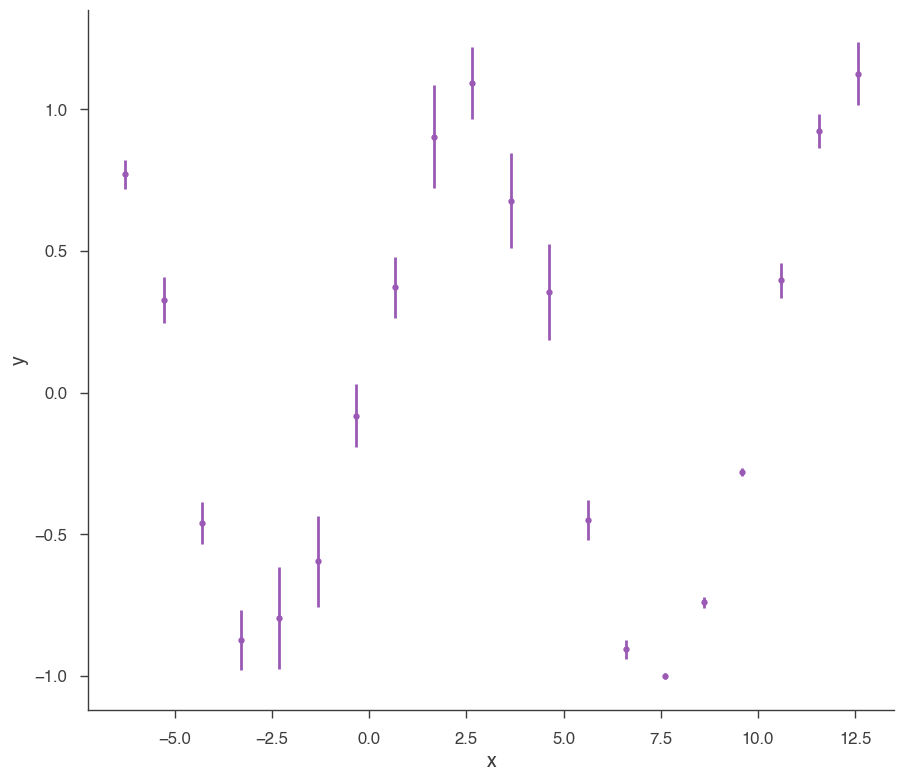

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=437884;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=554809;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

15:42:53 INFO      Mean acceptance fraction: 0.7050000000000001                                ]8;id=373091;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=835270;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

15:42:54 INFO      fit restored to maximum of posterior                                         ]8;id=99670;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=37937;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=753173;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=231753;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.006 +/- 0.009,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0006 -0.0022 +0.0023) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.870716
total,-10.870716


Values of statistical measures:

,statistical measures
AIC,26.447314
BIC,27.732896
DIC,25.973241
PDIC,2.115863


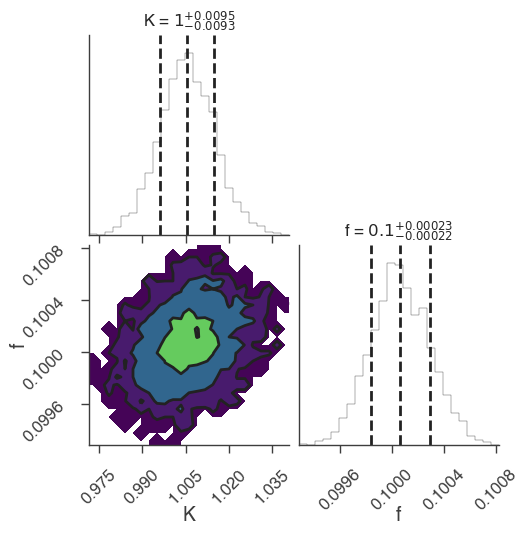

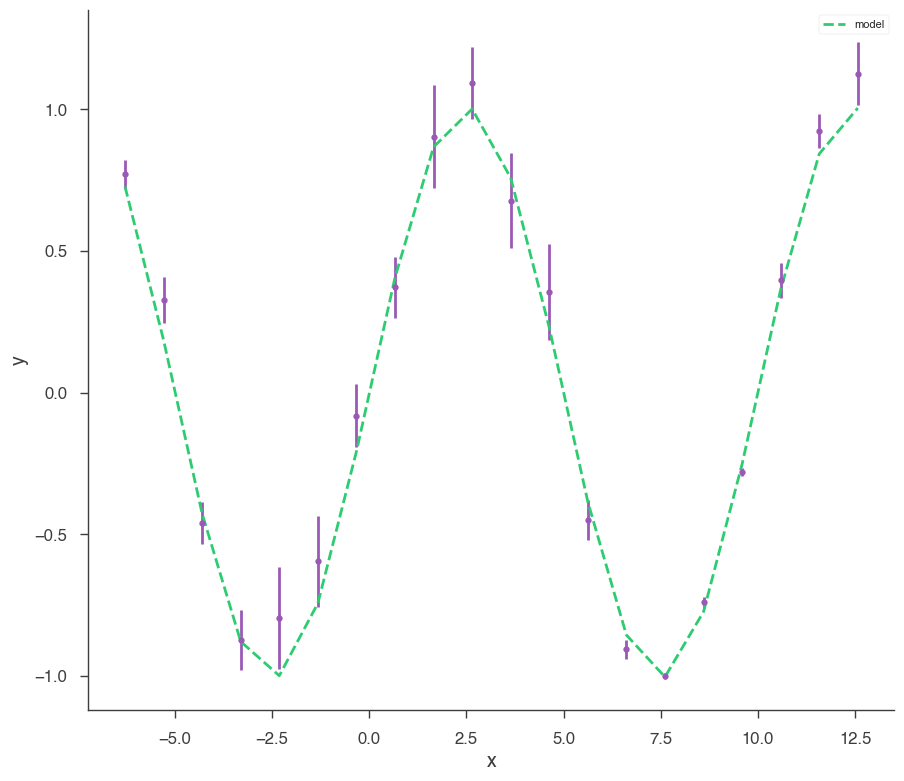

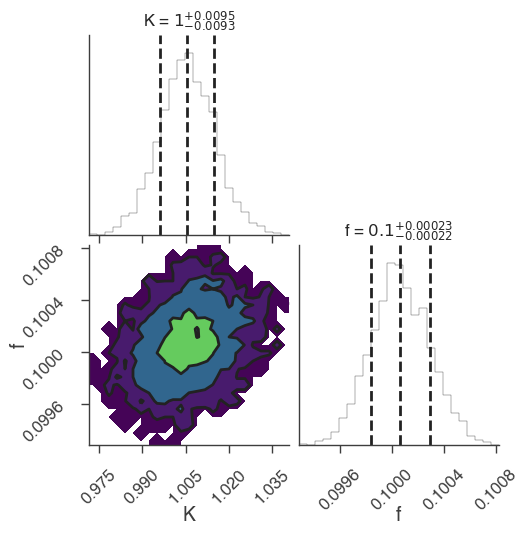

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

15:42:55 INFO      sampler set to multinest                                                ]8;id=29694;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=438615;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -21.488759150886164      +/-  0.15486492547624867     
 Total Likelihood Evaluations:         5696
 Sampling finished. Exiting MultiNest



15:42:56 INFO      fit restored to maximum of posterior                                         ]8;id=175848;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=100352;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=390423;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=549963;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.005 -0.010 +0.009,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0008 +/- 0.0022) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.873147
total,-10.873147


Values of statistical measures:

,statistical measures
AIC,26.452176
BIC,27.737758
DIC,25.628490
PDIC,1.939529
log(Z),-9.332450


         INFO      deleting the chain directory chains                                     ]8;id=296853;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=311035;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

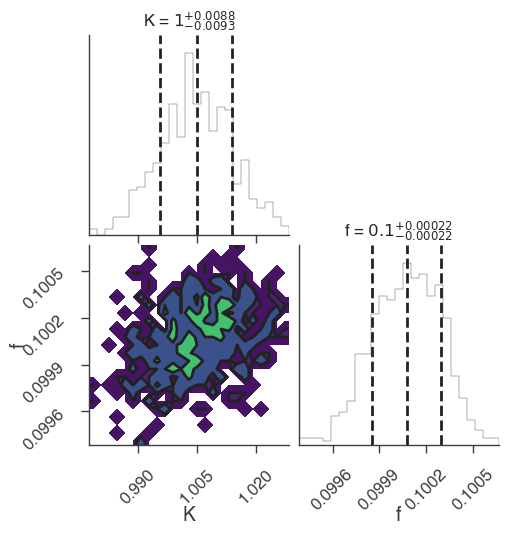

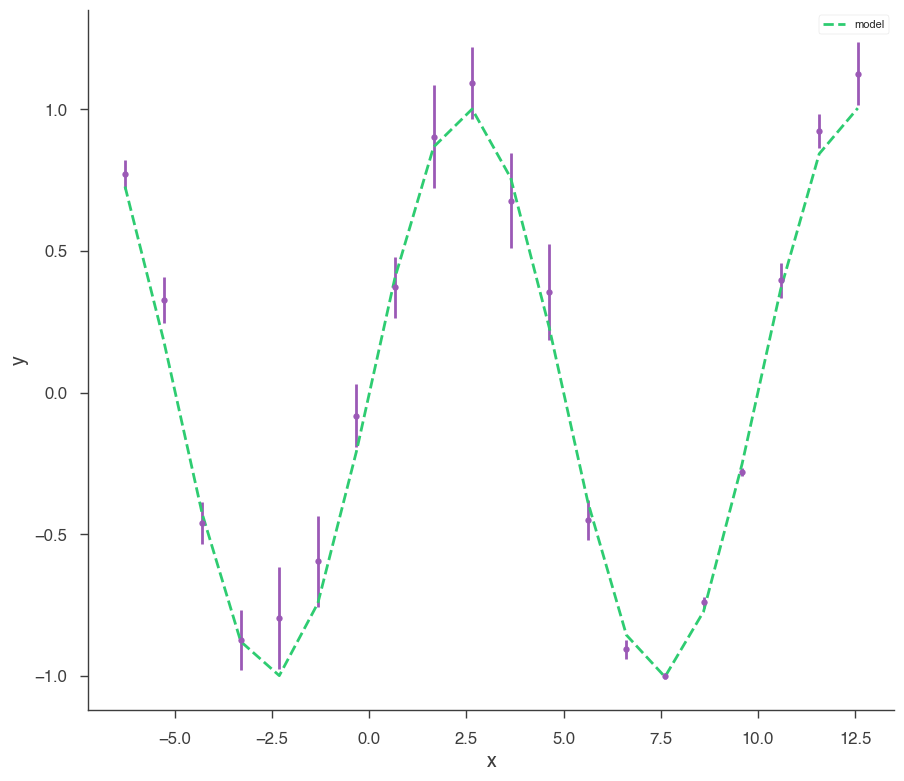

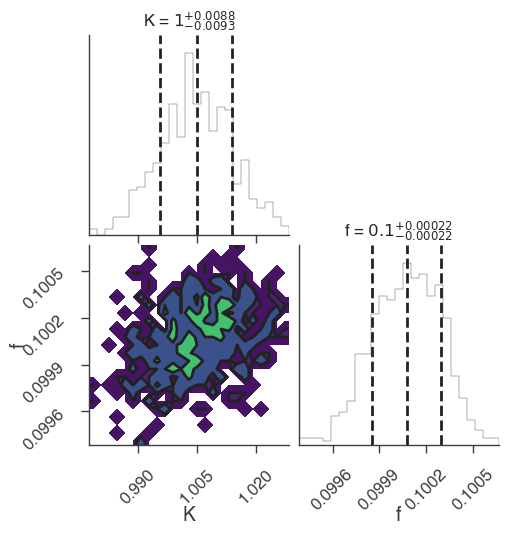

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

15:42:57 INFO      sampler set to dynesty_nested                                           ]8;id=734633;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=623920;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

200it [00:00, 1994.34it/s, bound: 0 | nc: 1 | ncall: 647 | eff(%): 30.912 | loglstar:   -inf < -11584.289 <    inf | logz: -11591.473 +/-  0.134 | dlogz: 11527.069 >  0.409]

400it [00:00, 1565.84it/s, bound: 0 | nc: 4 | ncall: 1084 | eff(%): 36.900 | loglstar:   -inf < -7125.433 <    inf | logz: -7132.767 +/-  0.131 | dlogz: 7054.611 >  0.409]  

563it [00:00, 1552.90it/s, bound: 0 | nc: 2 | ncall: 1632 | eff(%): 34.498 | loglstar:   -inf < -5517.276 <    inf | logz: -5525.365 +/-  0.142 | dlogz: 5477.581 >  0.409]

722it [00:00, 1354.17it/s, bound: 0 | nc: 4 | ncall: 2351 | eff(%): 30.710 | loglstar:   -inf < -4729.970 <    inf | logz: -4738.450 +/-  0.145 | dlogz: 4688.449 >  0.409]

862it [00:00, 1118.40it/s, bound: 0 | nc: 4 | ncall: 3403 | eff(%): 25.331 | loglstar:   -inf < -4328.818 <    inf | logz: -4337.655 +/-  0.149 | dlogz: 4325.195 >  0.409]

981it [00:00, 926.22it/s, bound: 0 | nc: 26 | ncall: 4746 | eff(%): 20.670 | loglstar:   -inf < -3750.925 <    inf | logz: -3760.059 +/-  0.151 | dlogz: 3747.994 >  0.409]

1081it [00:01, 684.48it/s, bound: 0 | nc: 28 | ncall: 6042 | eff(%): 17.891 | loglstar:   -inf < -3432.979 <    inf | logz: -3442.197 +/-  0.148 | dlogz: 3421.776 >  0.409]

1161it [00:01, 575.58it/s, bound: 0 | nc: 5 | ncall: 7250 | eff(%): 16.014 | loglstar:   -inf < -2527.535 <    inf | logz: -2537.067 +/-  0.153 | dlogz: 2517.690 >  0.409] 

1228it [00:01, 537.36it/s, bound: 0 | nc: 5 | ncall: 8419 | eff(%): 14.586 | loglstar:   -inf < -2028.837 <    inf | logz: -2038.300 +/-  0.150 | dlogz: 2017.158 >  0.409]

1287it [00:01, 479.23it/s, bound: 0 | nc: 13 | ncall: 9452 | eff(%): 13.616 | loglstar:   -inf < -1695.083 <    inf | logz: -1704.980 +/-  0.157 | dlogz: 1688.928 >  0.409]

1339it [00:01, 385.69it/s, bound: 0 | nc: 1 | ncall: 10929 | eff(%): 12.252 | loglstar:   -inf < -1531.060 <    inf | logz: -1540.553 +/-  0.147 | dlogz: 1518.285 >  0.409]

1382it [00:02, 362.03it/s, bound: 0 | nc: 27 | ncall: 11901 | eff(%): 11.612 | loglstar:   -inf < -1381.278 <    inf | logz: -1391.349 +/-  0.157 | dlogz: 1371.372 >  0.409]

1421it [00:02, 317.49it/s, bound: 0 | nc: 14 | ncall: 13184 | eff(%): 10.778 | loglstar:   -inf < -1271.191 <    inf | logz: -1280.763 +/-  0.149 | dlogz: 1265.799 >  0.409]

1455it [00:02, 240.72it/s, bound: 0 | nc: 38 | ncall: 14483 | eff(%): 10.046 | loglstar:   -inf < -1187.336 <    inf | logz: -1197.125 +/-  0.150 | dlogz: 1182.216 >  0.409]

1482it [00:02, 220.06it/s, bound: 1 | nc: 2 | ncall: 14625 | eff(%): 10.133 | loglstar:   -inf < -1105.577 <    inf | logz: -1115.279 +/-  0.148 | dlogz: 1099.997 >  0.409] 

1672it [00:02, 519.59it/s, bound: 1 | nc: 1 | ncall: 14920 | eff(%): 11.206 | loglstar:   -inf < -767.170 <    inf | logz: -777.384 +/-  0.154 | dlogz: 761.876 >  0.409]   

1803it [00:02, 574.67it/s, bound: 2 | nc: 1 | ncall: 15199 | eff(%): 11.863 | loglstar:   -inf < -573.015 <    inf | logz: -583.961 +/-  0.160 | dlogz: 568.882 >  0.409]

1999it [00:03, 847.33it/s, bound: 2 | nc: 1 | ncall: 15479 | eff(%): 12.914 | loglstar:   -inf < -369.306 <    inf | logz: -380.634 +/-  0.162 | dlogz: 364.911 >  0.409]

2148it [00:03, 987.43it/s, bound: 2 | nc: 2 | ncall: 15792 | eff(%): 13.602 | loglstar:   -inf < -257.151 <    inf | logz: -267.529 +/-  0.156 | dlogz: 250.845 >  0.409]

2270it [00:03, 898.30it/s, bound: 3 | nc: 2 | ncall: 15954 | eff(%): 14.228 | loglstar:   -inf < -195.563 <    inf | logz: -206.302 +/-  0.156 | dlogz: 189.951 >  0.409]

2466it [00:03, 1138.64it/s, bound: 3 | nc: 1 | ncall: 16326 | eff(%): 15.105 | loglstar:   -inf < -126.375 <    inf | logz: -137.339 +/-  0.159 | dlogz: 120.512 >  0.409]

2600it [00:03, 968.46it/s, bound: 4 | nc: 1 | ncall: 16531 | eff(%): 15.728 | loglstar:   -inf < -89.719 <    inf | logz: -100.739 +/-  0.159 | dlogz: 83.499 >  0.409]   

2759it [00:03, 1105.61it/s, bound: 4 | nc: 1 | ncall: 16780 | eff(%): 16.442 | loglstar:   -inf < -65.747 <    inf | logz: -76.141 +/-  0.154 | dlogz: 58.471 >  0.409]

2887it [00:03, 892.63it/s, bound: 5 | nc: 1 | ncall: 17034 | eff(%): 16.948 | loglstar:   -inf < -49.880 <    inf | logz: -60.811 +/-  0.157 | dlogz: 42.832 >  0.409] 

3075it [00:04, 1100.69it/s, bound: 5 | nc: 2 | ncall: 17313 | eff(%): 17.761 | loglstar:   -inf < -35.617 <    inf | logz: -46.724 +/-  0.157 | dlogz: 28.258 >  0.409]

3207it [00:04, 900.92it/s, bound: 6 | nc: 1 | ncall: 17606 | eff(%): 18.215 | loglstar:   -inf < -28.392 <    inf | logz: -39.129 +/-  0.158 | dlogz: 20.293 >  0.409] 

3443it [00:04, 1199.99it/s, bound: 6 | nc: 2 | ncall: 17986 | eff(%): 19.143 | loglstar:   -inf < -21.203 <    inf | logz: -32.087 +/-  0.157 | dlogz: 12.648 >  0.409]

3591it [00:04, 1067.35it/s, bound: 7 | nc: 1 | ncall: 18255 | eff(%): 19.671 | loglstar:   -inf < -17.834 <    inf | logz: -28.848 +/-  0.158 | dlogz:  9.034 >  0.409]

3759it [00:04, 1197.66it/s, bound: 7 | nc: 2 | ncall: 18493 | eff(%): 20.327 | loglstar:   -inf < -15.283 <    inf | logz: -26.335 +/-  0.158 | dlogz:  6.097 >  0.409]

3908it [00:04, 963.38it/s, bound: 8 | nc: 2 | ncall: 18808 | eff(%): 20.778 | loglstar:   -inf < -13.974 <    inf | logz: -24.872 +/-  0.157 | dlogz:  4.268 >  0.409] 

4094it [00:04, 1145.52it/s, bound: 8 | nc: 1 | ncall: 19064 | eff(%): 21.475 | loglstar:   -inf < -12.742 <    inf | logz: -23.676 +/-  0.157 | dlogz:  2.663 >  0.409]

4242it [00:05, 946.11it/s, bound: 9 | nc: 2 | ncall: 19409 | eff(%): 21.856 | loglstar:   -inf < -12.223 <    inf | logz: -23.084 +/-  0.157 | dlogz:  1.807 >  0.409] 

4501it [00:05, 1273.94it/s, bound: 9 | nc: 3 | ncall: 19800 | eff(%): 22.732 | loglstar:   -inf < -11.637 <    inf | logz: -22.477 +/-  0.157 | dlogz:  0.897 >  0.409]

4660it [00:05, 1080.07it/s, bound: 10 | nc: 1 | ncall: 20076 | eff(%): 23.212 | loglstar:   -inf < -11.405 <    inf | logz: -22.256 +/-  0.157 | dlogz:  0.580 >  0.409]

4786it [00:05, 847.81it/s, +400 | bound: 10 | nc: 1 | ncall: 20647 | eff(%): 25.614 | loglstar:   -inf < -10.866 <    inf | logz: -21.783 +/-  0.158 | dlogz:  0.001 >  0.409]

15:43:03 INFO      fit restored to maximum of posterior                                         ]8;id=354729;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=445665;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=982489;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=800925;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.005 -0.009 +0.010,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0006 -0.0022 +0.0024) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.870905
total,-10.870905


Values of statistical measures:

,statistical measures
AIC,26.447693
BIC,27.733275
DIC,25.904768
PDIC,2.081574
log(Z),-9.460272


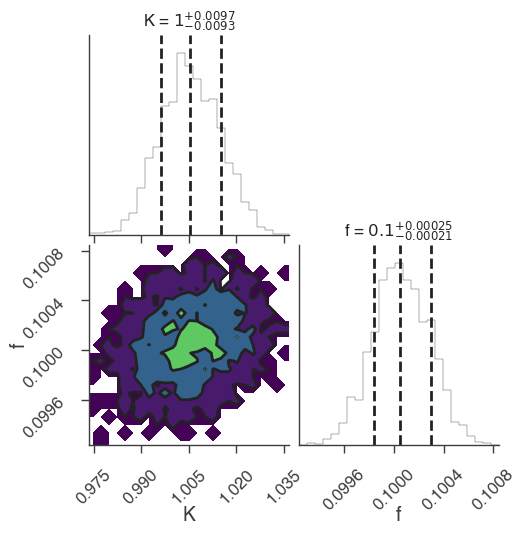

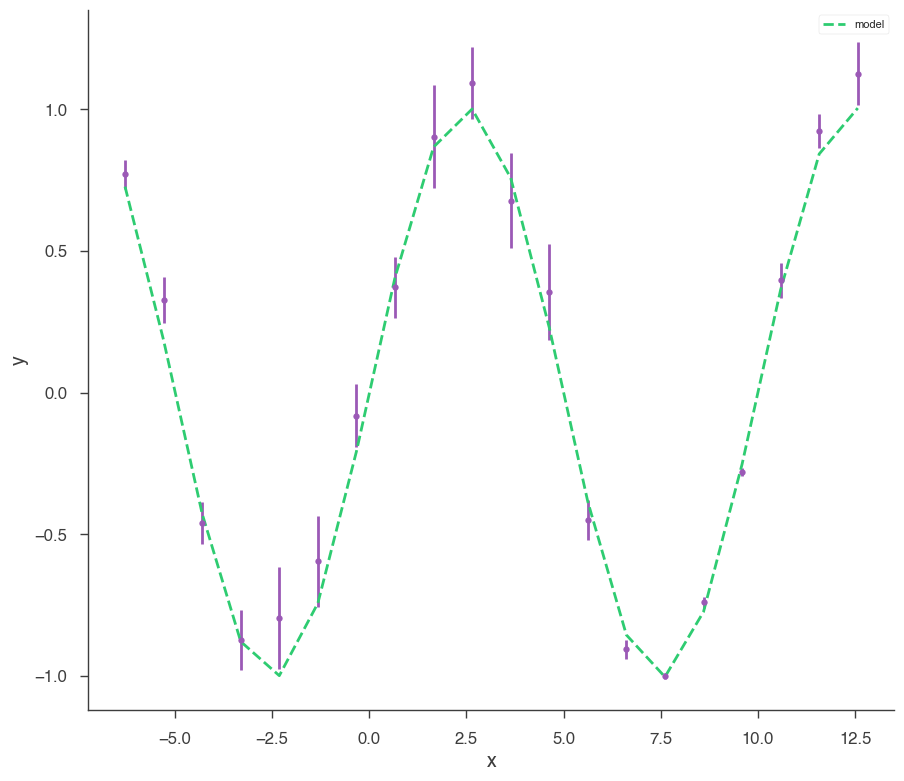

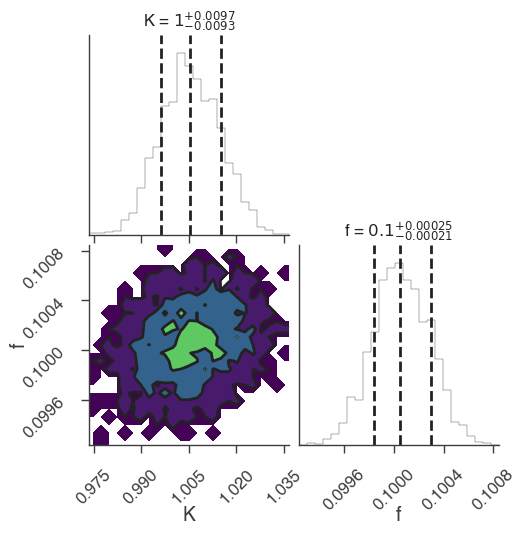

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

15:43:04 INFO      sampler set to dynesty_dynamic                                          ]8;id=396916;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=505824;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

109it [00:00, 1089.70it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 127 | eff(%): 17.384 | loglstar:   -inf < -17474.224 <    inf | logz: -17481.350 +/-  0.119 | dlogz: 17303.880 >  0.010]

318it [00:00, 1676.62it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 438 | eff(%): 33.902 | loglstar:   -inf < -10396.725 <    inf | logz: -10404.269 +/-  0.123 | dlogz: 10377.440 >  0.010]

486it [00:00, 1661.98it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 801 | eff(%): 37.356 | loglstar:   -inf < -7453.623 <    inf | logz: -7461.501 +/-  0.125 | dlogz: 7414.820 >  0.010]   

653it [00:00, 1591.75it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 1288 | eff(%): 36.521 | loglstar:   -inf < -5951.522 <    inf | logz: -5958.885 +/-  0.119 | dlogz: 5894.550 >  0.010]

813it [00:00, 1565.19it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 1965 | eff(%): 32.982 | loglstar:   -inf < -5162.089 <    inf | logz: -5170.025 +/-  0.120 | dlogz: 5105.432 >  0.010]

970it [00:00, 1301.45it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2895 | eff(%): 28.571 | loglstar:   -inf < -4610.910 <    inf | logz: -4619.411 +/-  0.124 | dlogz: 4558.957 >  0.010]

1107it [00:00, 1119.57it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 4038 | eff(%): 24.394 | loglstar:   -inf < -4202.619 <    inf | logz: -4211.729 +/-  0.135 | dlogz: 4154.952 >  0.010]

1227it [00:01, 990.73it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 5122 | eff(%): 21.825 | loglstar:   -inf < -3741.214 <    inf | logz: -3750.353 +/-  0.132 | dlogz: 3709.271 >  0.010] 

1333it [00:01, 885.02it/s, batch: 0 | bound: 0 | nc: 68 | ncall: 6329 | eff(%): 19.520 | loglstar:   -inf < -3443.544 <    inf | logz: -3452.571 +/-  0.130 | dlogz: 3418.698 >  0.010]

1427it [00:01, 745.28it/s, batch: 0 | bound: 0 | nc: 41 | ncall: 7780 | eff(%): 17.234 | loglstar:   -inf < -2721.601 <    inf | logz: -2731.358 +/-  0.140 | dlogz: 2702.890 >  0.010]

1507it [00:01, 671.79it/s, batch: 0 | bound: 0 | nc: 25 | ncall: 9154 | eff(%): 15.610 | loglstar:   -inf < -2184.607 <    inf | logz: -2193.971 +/-  0.134 | dlogz: 2177.909 >  0.010]

1578it [00:01, 553.44it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 10641 | eff(%): 14.164 | loglstar:   -inf < -1858.029 <    inf | logz: -1868.083 +/-  0.141 | dlogz: 1857.577 >  0.010]

1638it [00:01, 520.41it/s, batch: 0 | bound: 0 | nc: 58 | ncall: 11879 | eff(%): 13.232 | loglstar:   -inf < -1648.625 <    inf | logz: -1658.745 +/-  0.141 | dlogz: 1645.885 >  0.010]

1693it [00:02, 451.26it/s, batch: 0 | bound: 0 | nc: 24 | ncall: 13262 | eff(%): 12.302 | loglstar:   -inf < -1499.351 <    inf | logz: -1509.580 +/-  0.141 | dlogz: 1496.526 >  0.010]

1741it [00:02, 384.56it/s, batch: 0 | bound: 0 | nc: 43 | ncall: 14999 | eff(%): 11.233 | loglstar:   -inf < -1379.601 <    inf | logz: -1389.217 +/-  0.136 | dlogz: 1373.902 >  0.010]

1782it [00:02, 360.03it/s, batch: 0 | bound: 0 | nc: 32 | ncall: 16176 | eff(%): 10.686 | loglstar:   -inf < -1290.043 <    inf | logz: -1299.473 +/-  0.133 | dlogz: 1283.646 >  0.010]

1820it [00:02, 341.88it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 17042 | eff(%): 10.375 | loglstar:   -inf < -1192.982 <    inf | logz: -1202.705 +/-  0.137 | dlogz: 1187.184 >  0.010] 

1855it [00:02, 258.18it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18042 | eff(%): 10.004 | loglstar:   -inf < -1120.521 <    inf | logz: -1130.086 +/-  0.134 | dlogz: 1114.141 >  0.010]

2048it [00:02, 572.93it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18290 | eff(%): 10.899 | loglstar:   -inf < -797.004 <    inf | logz: -807.515 +/-  0.140 | dlogz: 791.645 >  0.010]   

2220it [00:02, 816.12it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 18611 | eff(%): 11.616 | loglstar:   -inf < -568.115 <    inf | logz: -579.451 +/-  0.150 | dlogz: 569.163 >  0.010]

2326it [00:03, 697.89it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18820 | eff(%): 12.039 | loglstar:   -inf < -460.335 <    inf | logz: -470.992 +/-  0.141 | dlogz: 456.416 >  0.010]

2564it [00:03, 1050.80it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 19198 | eff(%): 13.017 | loglstar:   -inf < -292.798 <    inf | logz: -302.875 +/-  0.138 | dlogz: 287.197 >  0.010]

2715it [00:03, 1152.86it/s, batch: 0 | bound: 2 | nc: 9 | ncall: 19525 | eff(%): 13.558 | loglstar:   -inf < -229.439 <    inf | logz: -240.440 +/-  0.140 | dlogz: 224.685 >  0.010]

2854it [00:03, 997.17it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19722 | eff(%): 14.113 | loglstar:   -inf < -181.072 <    inf | logz: -192.090 +/-  0.141 | dlogz: 176.000 >  0.010] 

3035it [00:03, 1179.88it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 20040 | eff(%): 14.776 | loglstar:   -inf < -127.169 <    inf | logz: -137.961 +/-  0.140 | dlogz: 121.254 >  0.010]

3173it [00:03, 918.89it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20346 | eff(%): 15.221 | loglstar:   -inf < -100.269 <    inf | logz: -111.049 +/-  0.139 | dlogz: 93.985 >  0.010]  

3379it [00:03, 1154.19it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20677 | eff(%): 15.956 | loglstar:   -inf < -67.367 <    inf | logz: -77.623 +/-  0.138 | dlogz: 60.057 >  0.010] 

3536it [00:04, 1248.14it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 21031 | eff(%): 16.423 | loglstar:   -inf < -53.991 <    inf | logz: -64.739 +/-  0.140 | dlogz: 46.872 >  0.010]

3682it [00:04, 1023.26it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21218 | eff(%): 16.954 | loglstar:   -inf < -42.907 <    inf | logz: -54.024 +/-  0.141 | dlogz: 35.874 >  0.010]

3869it [00:04, 1204.75it/s, batch: 0 | bound: 5 | nc: 5 | ncall: 21547 | eff(%): 17.549 | loglstar:   -inf < -33.144 <    inf | logz: -43.877 +/-  0.140 | dlogz: 25.306 >  0.010]

4011it [00:04, 951.44it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21842 | eff(%): 17.953 | loglstar:   -inf < -27.121 <    inf | logz: -38.114 +/-  0.141 | dlogz: 19.257 >  0.010] 

4201it [00:04, 1143.89it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 22112 | eff(%): 18.579 | loglstar:   -inf < -21.892 <    inf | logz: -32.738 +/-  0.140 | dlogz: 13.487 >  0.010]

4380it [00:04, 1288.94it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 22446 | eff(%): 19.088 | loglstar:   -inf < -18.953 <    inf | logz: -29.659 +/-  0.139 | dlogz: 10.041 >  0.010]

4531it [00:05, 1044.96it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22682 | eff(%): 19.545 | loglstar:   -inf < -17.009 <    inf | logz: -27.791 +/-  0.140 | dlogz:  7.869 >  0.010]

4732it [00:05, 1249.17it/s, batch: 0 | bound: 7 | nc: 7 | ncall: 22992 | eff(%): 20.143 | loglstar:   -inf < -14.953 <    inf | logz: -25.812 +/-  0.140 | dlogz:  5.500 >  0.010]

4881it [00:05, 1019.47it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23334 | eff(%): 20.479 | loglstar:   -inf < -13.801 <    inf | logz: -24.709 +/-  0.141 | dlogz:  4.111 >  0.010]

5093it [00:05, 1245.17it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23645 | eff(%): 21.093 | loglstar:   -inf < -12.748 <    inf | logz: -23.594 +/-  0.141 | dlogz:  2.628 >  0.010]

5259it [00:05, 1339.11it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 23989 | eff(%): 21.475 | loglstar:   -inf < -12.211 <    inf | logz: -23.048 +/-  0.140 | dlogz:  1.846 >  0.010]

5414it [00:05, 1005.84it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24206 | eff(%): 21.914 | loglstar:   -inf < -11.889 <    inf | logz: -22.685 +/-  0.140 | dlogz:  1.313 >  0.010]

5579it [00:05, 1132.61it/s, batch: 0 | bound: 9 | nc: 6 | ncall: 24475 | eff(%): 22.338 | loglstar:   -inf < -11.597 <    inf | logz: -22.409 +/-  0.140 | dlogz:  0.912 >  0.010]

5718it [00:06, 938.93it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24807 | eff(%): 22.595 | loglstar:   -inf < -11.404 <    inf | logz: -22.233 +/-  0.140 | dlogz:  0.666 >  0.010]

5926it [00:06, 1168.08it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 25060 | eff(%): 23.185 | loglstar:   -inf < -11.228 <    inf | logz: -22.046 +/-  0.140 | dlogz:  0.417 >  0.010]

6097it [00:06, 1288.28it/s, batch: 0 | bound: 10 | nc: 3 | ncall: 25367 | eff(%): 23.571 | loglstar:   -inf < -11.133 <    inf | logz: -21.942 +/-  0.140 | dlogz:  0.286 >  0.010]

6249it [00:06, 1015.41it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25622 | eff(%): 23.922 | loglstar:   -inf < -11.061 <    inf | logz: -21.876 +/-  0.140 | dlogz:  0.206 >  0.010]

6429it [00:06, 1176.69it/s, batch: 0 | bound: 11 | nc: 3 | ncall: 25920 | eff(%): 24.334 | loglstar:   -inf < -11.009 <    inf | logz: -21.819 +/-  0.140 | dlogz:  0.141 >  0.010]

6580it [00:06, 1252.50it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 26226 | eff(%): 24.620 | loglstar:   -inf < -10.971 <    inf | logz: -21.785 +/-  0.140 | dlogz:  0.103 >  0.010]

6725it [00:07, 1020.60it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26454 | eff(%): 24.950 | loglstar:   -inf < -10.944 <    inf | logz: -21.761 +/-  0.140 | dlogz:  0.076 >  0.010]

6910it [00:07, 1199.35it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 26749 | eff(%): 25.359 | loglstar:   -inf < -10.918 <    inf | logz: -21.738 +/-  0.140 | dlogz:  0.052 >  0.010]

7051it [00:07, 978.46it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27061 | eff(%): 25.583 | loglstar:   -inf < -10.904 <    inf | logz: -21.726 +/-  0.140 | dlogz:  0.039 >  0.010] 

7271it [00:07, 1232.85it/s, batch: 0 | bound: 13 | nc: 4 | ncall: 27358 | eff(%): 26.100 | loglstar:   -inf < -10.891 <    inf | logz: -21.712 +/-  0.140 | dlogz:  0.025 >  0.010]

7474it [00:07, 1414.70it/s, batch: 0 | bound: 13 | nc: 5 | ncall: 27767 | eff(%): 26.441 | loglstar:   -inf < -10.883 <    inf | logz: -21.704 +/-  0.140 | dlogz:  0.017 >  0.010]

7639it [00:07, 1157.91it/s, batch: 0 | bound: 14 | nc: 1 | ncall: 28008 | eff(%): 26.796 | loglstar:   -inf < -10.878 <    inf | logz: -21.699 +/-  0.140 | dlogz:  0.012 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8224it [00:08, 831.39it/s, batch: 1 | bound: 0 | nc: 2 | ncall: 28636 | eff(%): 28.719 | loglstar: -12.754 < -11.123 < -11.331 | logz: -21.688 +/-  0.144 | stop:  1.462]          

8418it [00:08, 947.94it/s, batch: 1 | bound: 2 | nc: 5 | ncall: 28886 | eff(%): 28.628 | loglstar: -12.754 < -12.131 < -11.331 | logz: -21.688 +/-  0.144 | stop:  1.462]

8577it [00:08, 1031.34it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 29197 | eff(%): 28.863 | loglstar: -12.754 < -11.780 < -11.331 | logz: -21.688 +/-  0.144 | stop:  1.462]

8723it [00:08, 941.25it/s, batch: 1 | bound: 3 | nc: 2 | ncall: 29465 | eff(%): 29.092 | loglstar: -12.754 < -11.550 < -11.331 | logz: -21.688 +/-  0.144 | stop:  1.462] 

8966it [00:09, 1182.11it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 29792 | eff(%): 29.648 | loglstar: -12.754 < -11.266 < -11.331 | logz: -21.688 +/-  0.144 | stop:  1.462]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9398it [00:09, 713.42it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 30242 | eff(%): 31.076 | loglstar: -13.244 < -12.265 < -12.752 | logz: -21.678 +/-  0.118 | stop:  1.048] 

9799it [00:10, 1034.81it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 30695 | eff(%): 31.690 | loglstar: -13.244 < -11.674 < -12.752 | logz: -21.678 +/-  0.118 | stop:  1.048]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



10007it [00:10, 937.51it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 30921 | eff(%): 32.363 | loglstar: -13.244 < -10.865 < -12.752 | logz: -21.678 +/-  0.118 | stop:  0.978]

15:43:15 INFO      fit restored to maximum of posterior                                         ]8;id=462736;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=741816;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=350823;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=782057;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.006 +/- 0.009,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0006 +/- 0.0022) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.870716
total,-10.870716


Values of statistical measures:

,statistical measures
AIC,26.447314
BIC,27.732896
DIC,25.636190
PDIC,1.947139
log(Z),-9.412188


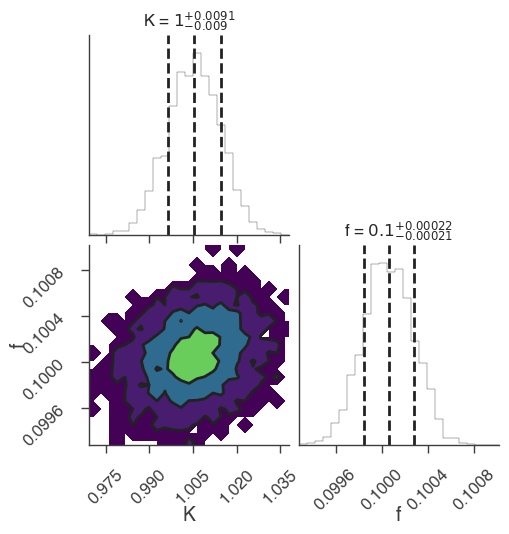

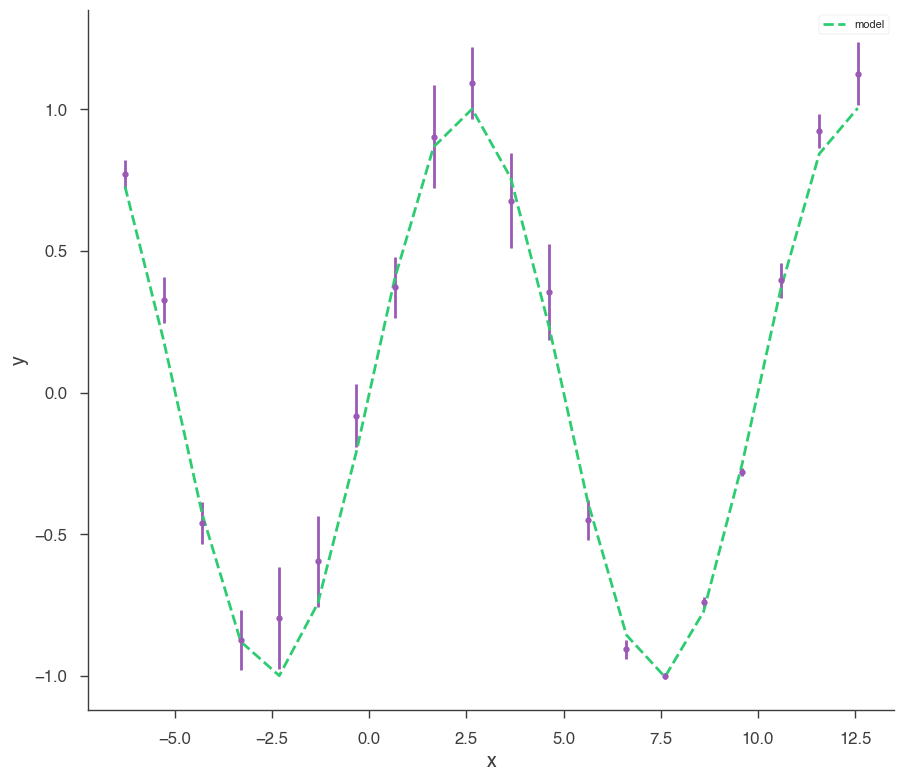

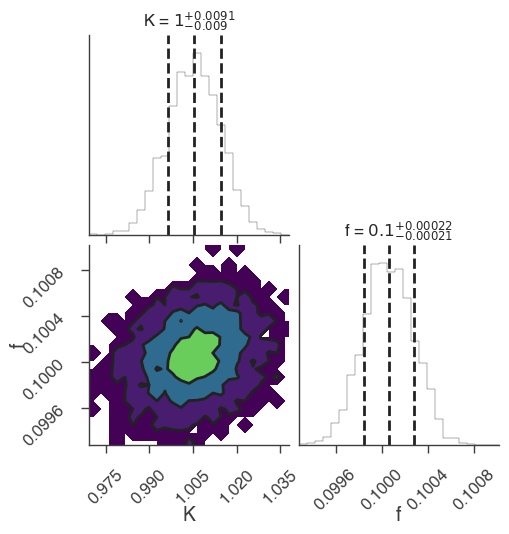

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

15:43:16 INFO      sampler set to zeus                                                     ]8;id=365961;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=915118;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 6/625 [00:00<00:13, 44.50it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:12, 50.63it/s]

Sampling progress :   3%|▎         | 18/625 [00:00<00:11, 53.02it/s]

Sampling progress :   4%|▍         | 25/625 [00:00<00:10, 57.26it/s]

Sampling progress :   5%|▌         | 33/625 [00:00<00:09, 63.39it/s]

Sampling progress :   7%|▋         | 41/625 [00:00<00:08, 66.17it/s]

Sampling progress :   8%|▊         | 49/625 [00:00<00:08, 69.94it/s]

Sampling progress :   9%|▉         | 57/625 [00:00<00:08, 68.65it/s]

Sampling progress :  10%|█         | 65/625 [00:01<00:07, 71.08it/s]

Sampling progress :  12%|█▏        | 73/625 [00:01<00:07, 71.90it/s]

Sampling progress :  13%|█▎        | 81/625 [00:01<00:07, 72.48it/s]

Sampling progress :  14%|█▍        | 89/625 [00:01<00:07, 69.80it/s]

Sampling progress :  16%|█▌        | 97/625 [00:01<00:07, 72.04it/s]

Sampling progress :  17%|█▋        | 105/625 [00:01<00:07, 72.26it/s]

Sampling progress :  18%|█▊        | 113/625 [00:01<00:07, 69.76it/s]

Sampling progress :  19%|█▉        | 121/625 [00:01<00:07, 70.83it/s]

Sampling progress :  21%|██        | 129/625 [00:01<00:07, 68.12it/s]

Sampling progress :  22%|██▏       | 136/625 [00:02<00:07, 66.86it/s]

Sampling progress :  23%|██▎       | 144/625 [00:02<00:07, 68.33it/s]

Sampling progress :  24%|██▍       | 152/625 [00:02<00:06, 70.35it/s]

Sampling progress :  26%|██▌       | 161/625 [00:02<00:06, 75.58it/s]

Sampling progress :  27%|██▋       | 170/625 [00:02<00:05, 77.17it/s]

Sampling progress :  28%|██▊       | 178/625 [00:02<00:05, 74.95it/s]

Sampling progress :  30%|██▉       | 186/625 [00:02<00:05, 74.43it/s]

Sampling progress :  31%|███       | 194/625 [00:02<00:05, 73.01it/s]

Sampling progress :  32%|███▏      | 202/625 [00:02<00:06, 69.92it/s]

Sampling progress :  34%|███▎      | 210/625 [00:03<00:06, 69.08it/s]

Sampling progress :  35%|███▍      | 218/625 [00:03<00:05, 70.20it/s]

Sampling progress :  36%|███▌      | 226/625 [00:03<00:05, 72.40it/s]

Sampling progress :  37%|███▋      | 234/625 [00:03<00:05, 70.60it/s]

Sampling progress :  39%|███▊      | 242/625 [00:03<00:05, 70.48it/s]

Sampling progress :  40%|████      | 250/625 [00:03<00:05, 71.06it/s]

Sampling progress :  41%|████▏     | 258/625 [00:03<00:05, 71.05it/s]

Sampling progress :  43%|████▎     | 266/625 [00:03<00:05, 67.92it/s]

Sampling progress :  44%|████▍     | 274/625 [00:03<00:05, 69.57it/s]

Sampling progress :  45%|████▍     | 281/625 [00:04<00:04, 69.21it/s]

Sampling progress :  46%|████▌     | 288/625 [00:04<00:04, 68.66it/s]

Sampling progress :  47%|████▋     | 296/625 [00:04<00:04, 69.94it/s]

Sampling progress :  49%|████▉     | 305/625 [00:04<00:04, 73.82it/s]

Sampling progress :  50%|█████     | 313/625 [00:04<00:04, 73.74it/s]

Sampling progress :  51%|█████▏    | 321/625 [00:04<00:04, 73.40it/s]

Sampling progress :  53%|█████▎    | 329/625 [00:04<00:04, 73.47it/s]

Sampling progress :  54%|█████▍    | 337/625 [00:04<00:04, 71.28it/s]

Sampling progress :  55%|█████▌    | 345/625 [00:05<00:05, 54.70it/s]

Sampling progress :  56%|█████▋    | 352/625 [00:05<00:04, 55.27it/s]

Sampling progress :  57%|█████▋    | 359/625 [00:05<00:04, 57.83it/s]

Sampling progress :  59%|█████▊    | 367/625 [00:05<00:04, 62.78it/s]

Sampling progress :  60%|██████    | 375/625 [00:05<00:03, 64.52it/s]

Sampling progress :  61%|██████    | 382/625 [00:05<00:03, 65.34it/s]

Sampling progress :  63%|██████▎   | 391/625 [00:05<00:03, 70.09it/s]

Sampling progress :  64%|██████▍   | 399/625 [00:05<00:03, 68.87it/s]

Sampling progress :  65%|██████▌   | 408/625 [00:05<00:02, 73.35it/s]

Sampling progress :  67%|██████▋   | 416/625 [00:06<00:02, 74.33it/s]

Sampling progress :  68%|██████▊   | 425/625 [00:06<00:02, 77.44it/s]

Sampling progress :  69%|██████▉   | 433/625 [00:06<00:02, 76.55it/s]

Sampling progress :  71%|███████   | 441/625 [00:06<00:02, 76.84it/s]

Sampling progress :  72%|███████▏  | 449/625 [00:06<00:02, 76.65it/s]

Sampling progress :  73%|███████▎  | 458/625 [00:06<00:02, 78.45it/s]

Sampling progress :  75%|███████▍  | 466/625 [00:06<00:02, 76.77it/s]

Sampling progress :  76%|███████▌  | 474/625 [00:06<00:02, 75.07it/s]

Sampling progress :  77%|███████▋  | 482/625 [00:06<00:02, 71.33it/s]

Sampling progress :  78%|███████▊  | 490/625 [00:07<00:01, 71.64it/s]

Sampling progress :  80%|███████▉  | 498/625 [00:07<00:01, 72.19it/s]

Sampling progress :  81%|████████  | 506/625 [00:07<00:01, 73.79it/s]

Sampling progress :  82%|████████▏ | 514/625 [00:07<00:01, 74.37it/s]

Sampling progress :  84%|████████▎ | 522/625 [00:07<00:01, 73.36it/s]

Sampling progress :  85%|████████▍ | 530/625 [00:07<00:01, 72.33it/s]

Sampling progress :  86%|████████▌ | 539/625 [00:07<00:01, 74.80it/s]

Sampling progress :  88%|████████▊ | 547/625 [00:07<00:01, 74.84it/s]

Sampling progress :  89%|████████▉ | 555/625 [00:07<00:00, 74.28it/s]

Sampling progress :  90%|█████████ | 563/625 [00:08<00:00, 72.45it/s]

Sampling progress :  91%|█████████▏| 571/625 [00:08<00:00, 74.11it/s]

Sampling progress :  93%|█████████▎| 579/625 [00:08<00:00, 70.43it/s]

Sampling progress :  94%|█████████▍| 587/625 [00:08<00:00, 69.14it/s]

Sampling progress :  95%|█████████▌| 594/625 [00:08<00:00, 67.77it/s]

Sampling progress :  96%|█████████▌| 601/625 [00:08<00:00, 66.52it/s]

Sampling progress :  97%|█████████▋| 608/625 [00:08<00:00, 66.95it/s]

Sampling progress :  98%|█████████▊| 615/625 [00:08<00:00, 65.30it/s]

Sampling progress : 100%|█████████▉| 623/625 [00:08<00:00, 67.83it/s]

Sampling progress : 100%|██████████| 625/625 [00:08<00:00, 69.85it/s]

15:43:25 INFO      fit restored to maximum of posterior                                         ]8;id=761657;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=829578;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=916199;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=751885;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 27


Scale Factor: 1.124415


Mean Integrated Autocorrelation Time: 2.98


Effective Sample Size: 4200.21


Number of Log Probability Evaluations: 65937


Effective Samples per Log Probability Evaluation: 0.0637


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.006 +/- 0.009,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0006 -0.0022 +0.0021) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.870799
total,-10.870799


Values of statistical measures:

,statistical measures
AIC,26.447481
BIC,27.733063
DIC,25.774258
PDIC,2.015320


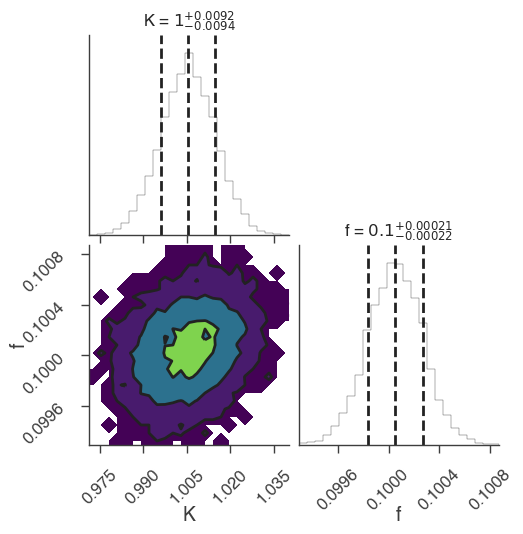

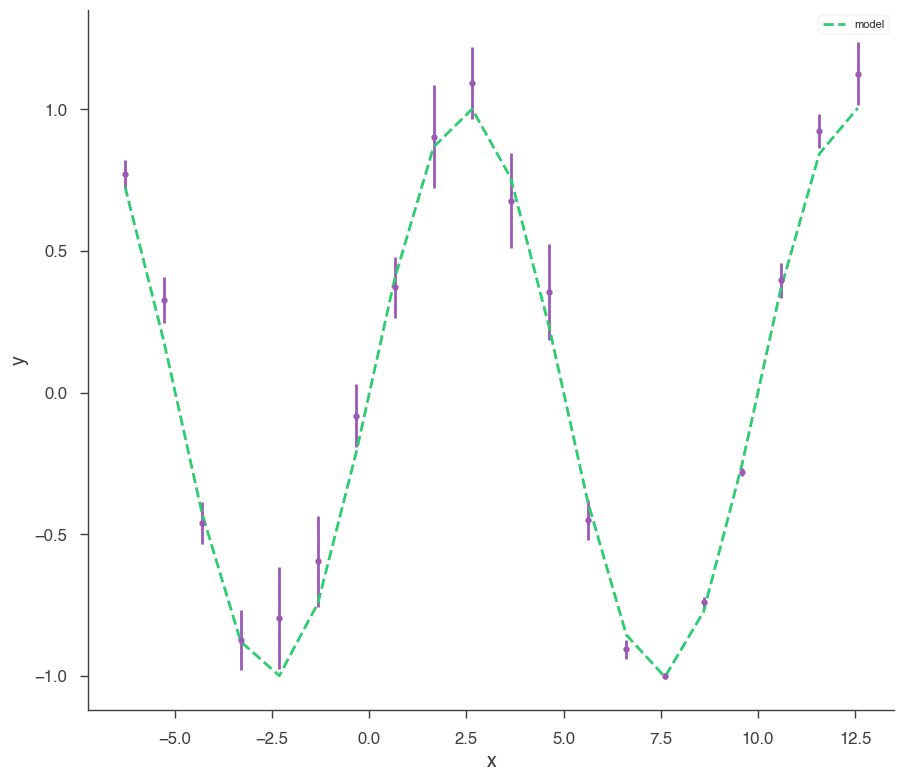

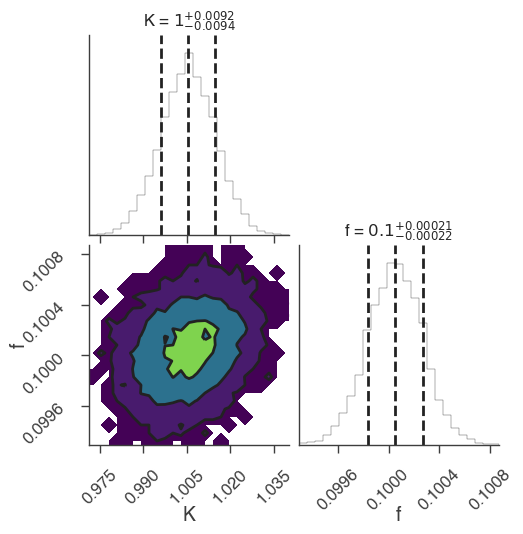

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

15:43:27 INFO      sampler set to ultranest                                                ]8;id=44819;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=655172;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01  


[ultranest] Likelihood function evaluations: 9080


[ultranest]   logZ = -21.48 +- 0.09479


[ultranest] Effective samples strategy satisfied (ESS = 963.7, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.16 bs:0.09 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


15:43:35 INFO      fit restored to maximum of posterior                                         ]8;id=939984;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=239424;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=950221;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=986925;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.005 -0.008 +0.010,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0007 -0.0023 +0.0021) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.873269
total,-10.873269


Values of statistical measures:

,statistical measures
AIC,26.452420
BIC,27.738003
DIC,25.521181
PDIC,1.888308
log(Z),-9.325986


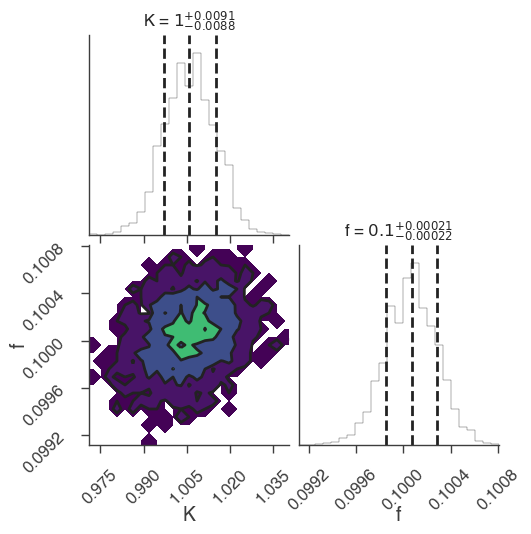

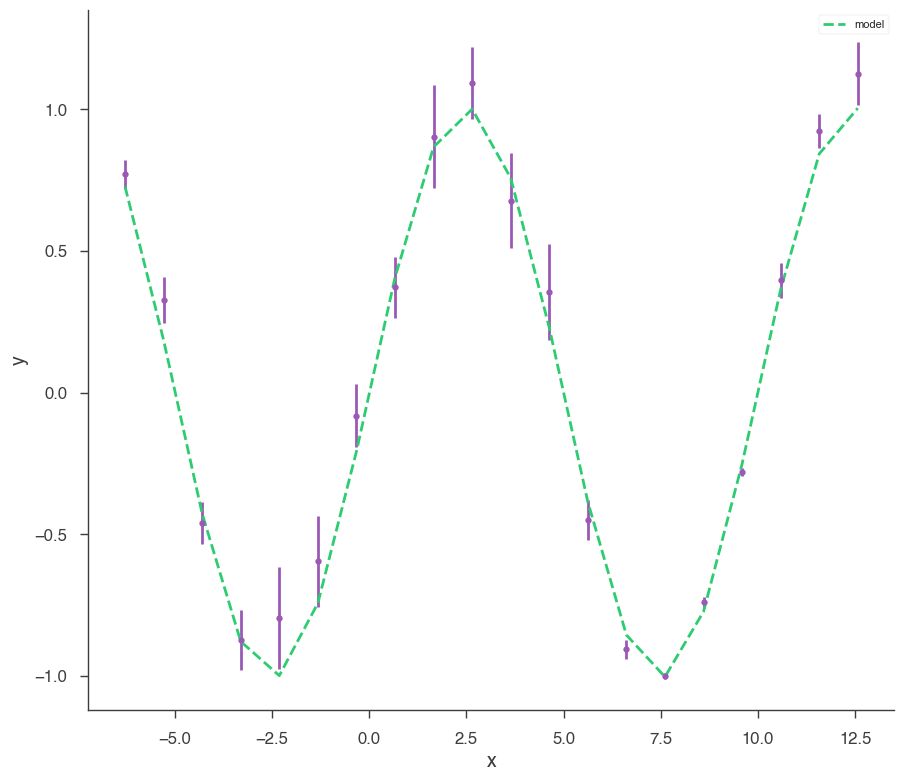

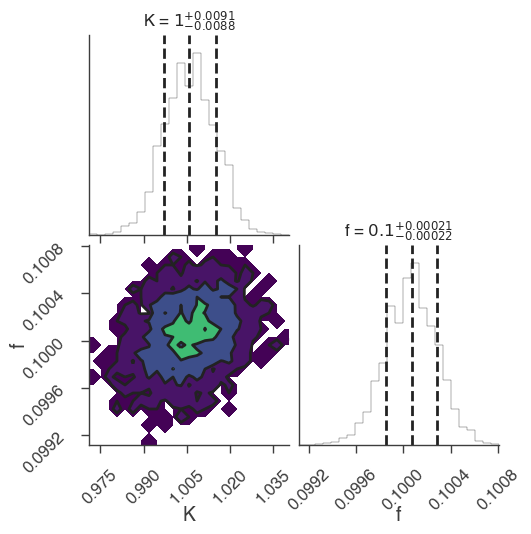

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()